In [9]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

salesSum = pd.read_csv(r'../DATA/Droped_t_sales_sum.csv', low_memory=False)
salesSum = salesSum[salesSum.sale_amt_3m >= 0]
print(salesSum.head(10))

           dt  shop_id  sale_amt_3m
0  2016-12-31     2143     72983.09
1  2016-07-31     2143    106943.03
2  2016-08-31     2143    183723.36
3  2016-09-30     2143    235568.57
4  2016-11-30     2143     80115.29
5  2016-12-31     1559     67228.29
6  2016-08-31     1559    267183.30
7  2017-01-31     1559     83264.96
8  2016-10-31     1559    123020.74
9  2016-12-31     1296     24583.73


In [10]:
tOrder = pd.read_csv(r'../DATA/t_order.csv',low_memory=False)
tOrder = tOrder[tOrder.sale_amt >= 0]
print(tOrder.head(10))

       ord_dt  sale_amt  offer_amt  offer_cnt  shop_id  rtn_cnt  rtn_amt  \
0  2016-09-04     19.82       0.00          0     1630        0      0.0   
1  2017-01-02     19.82       0.00          0     1630        0      0.0   
2  2016-09-23     19.82       0.00          0     1630        0      0.0   
3  2016-12-29     19.82       0.00          0     1630        0      0.0   
4  2016-08-26     19.82       0.00          0     1630        0      0.0   
5  2016-11-22     19.82       0.00          0     1630        0      0.0   
6  2016-10-17     19.82       0.00          0     1630        0      0.0   
7  2017-02-23     19.82       0.00          0     1630        0      0.0   
8  2016-11-20    138.76       0.00          0     1999        0      0.0   
9  2016-09-19    491.44      60.33          1     1411        0      0.0   

   ord_cnt  pid  user_cnt  
0        1   41         1  
1        1   41         1  
2        1   49         1  
3        1   49         1  
4        1   59        

In [ ]:
tOrder['datetime'] = pd.to_datetime(tOrder['ord_dt'])
saleWeekOrder = tOrder.groupby('shop_id').resample('1W',on='datetime').sum()
del saleWeekOrder['shop_id']
print(saleWeekOrder.head(100))

In [12]:
tOrder['datetime'] = pd.to_datetime(tOrder['ord_dt'])
saleSumOnlyDateAndAmt = tOrder[['datetime','sale_amt']]
print(saleSumOnlyDateAndAmt.head(10))
meanPeerDay = saleSumOnlyDateAndAmt.groupby('datetime').mean()
print(meanPeerDay)

    datetime  sale_amt
0 2016-09-04     19.82
1 2017-01-02     19.82
2 2016-09-23     19.82
3 2016-12-29     19.82
4 2016-08-26     19.82
5 2016-11-22     19.82
6 2016-10-17     19.82
7 2017-02-23     19.82
8 2016-11-20    138.76
9 2016-09-19    491.44
              sale_amt
datetime              
2016-08-03  111.320639
2016-08-04  110.917890
2016-08-05  111.605032
2016-08-06  111.751567
2016-08-07  111.093986
2016-08-08  115.274033
2016-08-09  113.856200
2016-08-10  112.804142
2016-08-11  115.818342
2016-08-12  113.325088
2016-08-13  113.493525
2016-08-14  112.479654
2016-08-15  114.334294
2016-08-16  115.253432
2016-08-17  114.927513
2016-08-18  115.902854
2016-08-19  116.776560
2016-08-20  114.051138
2016-08-21  113.927240
2016-08-22  116.374984
2016-08-23  117.065371
2016-08-24  117.392346
2016-08-25  119.366510
2016-08-26  120.934994
2016-08-27  123.428519
2016-08-28  120.556922
2016-08-29  126.357103
2016-08-30  128.263224
2016-08-31  130.184306
2016-09-01  129.779192
...        

In [16]:
#将分组重新变为列属性
meanPeerDay = meanPeerDay.reset_index()
print(meanPeerDay)

      datetime    sale_amt
0   2016-08-03  111.320639
1   2016-08-04  110.917890
2   2016-08-05  111.605032
3   2016-08-06  111.751567
4   2016-08-07  111.093986
5   2016-08-08  115.274033
6   2016-08-09  113.856200
7   2016-08-10  112.804142
8   2016-08-11  115.818342
9   2016-08-12  113.325088
10  2016-08-13  113.493525
11  2016-08-14  112.479654
12  2016-08-15  114.334294
13  2016-08-16  115.253432
14  2016-08-17  114.927513
15  2016-08-18  115.902854
16  2016-08-19  116.776560
17  2016-08-20  114.051138
18  2016-08-21  113.927240
19  2016-08-22  116.374984
20  2016-08-23  117.065371
21  2016-08-24  117.392346
22  2016-08-25  119.366510
23  2016-08-26  120.934994
24  2016-08-27  123.428519
25  2016-08-28  120.556922
26  2016-08-29  126.357103
27  2016-08-30  128.263224
28  2016-08-31  130.184306
29  2016-09-01  129.779192
..         ...         ...
241 2017-04-01  127.429400
242 2017-04-02  121.029357
243 2017-04-03  121.521595
244 2017-04-04  112.544468
245 2017-04-05  129.328902
2

In [26]:
#按每周的总和输出
sumPeerWeek = meanPeerDay.resample('1W',on='datetime').sum()

sumPeerWeek = sumPeerWeek.reset_index()
print(sumPeerWeek)
#8月7号是3-7
#8月14是8-14

     datetime     sale_amt
0  2016-08-07   556.689115
1  2016-08-14   797.050984
2  2016-08-21   805.173031
3  2016-08-28   835.119646
4  2016-09-04   895.236405
5  2016-09-11   913.785240
6  2016-09-18   934.887375
7  2016-09-25   960.184955
8  2016-10-02   946.537497
9  2016-10-09   936.232129
10 2016-10-16   988.770136
11 2016-10-23  1021.238135
12 2016-10-30  1049.040408
13 2016-11-06  1071.404413
14 2016-11-13  1038.762127
15 2016-11-20   981.458897
16 2016-11-27  1023.163865
17 2016-12-04  1048.603880
18 2016-12-11  1065.696324
19 2016-12-18   986.268951
20 2016-12-25   995.148114
21 2017-01-01   999.073237
22 2017-01-08   994.071177
23 2017-01-15  1011.371217
24 2017-01-22   976.309447
25 2017-01-29   739.592213
26 2017-02-05   705.228859
27 2017-02-12   841.455593
28 2017-02-19   879.908510
29 2017-02-26   910.243695
30 2017-03-05   904.747630
31 2017-03-12   902.129906
32 2017-03-19   890.772428
33 2017-03-26   906.406347
34 2017-04-02   905.536064
35 2017-04-09   856.444287
3

In [25]:
baiduIndex = pd.read_csv(r'../DATA/BaiDuIn.csv', low_memory=False)
baiduIndex['datetime'] = pd.to_datetime(baiduIndex['datetime'])
print(baiduIndex.head(10))

    datetime  iphone  computer  alldev
0 2016-05-29  151532    254279  405811
1 2016-06-05  155725    223624  379349
2 2016-06-12  192068    327895  519963
3 2016-06-19  163104    264454  427558
4 2016-06-26  136514    230388  366902
5 2016-07-03  136983    232059  369042
6 2016-07-10  137784    233595  371379
7 2016-07-17  141883    236019  377902
8 2016-07-24  145117    238615  383732
9 2016-07-31  141900    236865  378765


In [28]:
baiduIndex = baiduIndex[(baiduIndex['datetime']>='2016-08-07')&(baiduIndex['datetime']<='2017-04-30')]
print(baiduIndex)

     datetime  iphone  computer  alldev
10 2016-08-07  140994    236530  377524
11 2016-08-14  139847    237085  376932
12 2016-08-21  137562    232730  370292
13 2016-08-28  136249    237919  374168
14 2016-09-04  151523    260567  412090
15 2016-09-11  156142    209142  365284
16 2016-09-18  144647    251723  396370
17 2016-09-25  152643    226622  379265
18 2016-10-02  158812    167614  326426
19 2016-10-09  146441    235138  381579
20 2016-10-16  148919    231263  380182
21 2016-10-23  158575    234968  393543
22 2016-10-30  191329    294951  486280
23 2016-11-06  268775    383814  652589
24 2016-11-13  160581    226552  387133
25 2016-11-20  146278    211525  357803
26 2016-11-27  145344    195158  340502
27 2016-12-04  138567    208727  347294
28 2016-12-11  157118    233641  390759
29 2016-12-18  141726    204006  345732
30 2016-12-25  135740    196599  332339
31 2017-01-01  154074    205025  359099
32 2017-01-08  158752    224060  382812
33 2017-01-15  158315    212550  370865


In [37]:
baiduIndex.columns

Index(['datetime', 'iphone', 'computer', 'alldev'], dtype='object')

In [40]:
baiduIndexDate = baiduIndex.set_index('datetime')
baiduIndexDate.columns
print(baiduIndexDate.head(10))

            iphone  computer  alldev
datetime                            
2016-08-07  140994    236530  377524
2016-08-14  139847    237085  376932
2016-08-21  137562    232730  370292
2016-08-28  136249    237919  374168
2016-09-04  151523    260567  412090
2016-09-11  156142    209142  365284
2016-09-18  144647    251723  396370
2016-09-25  152643    226622  379265
2016-10-02  158812    167614  326426
2016-10-09  146441    235138  381579


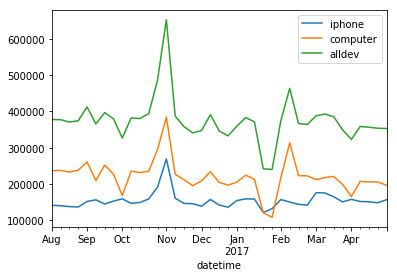

In [43]:
%matplotlib inline
import matplotlib
baiduIndexDate.plot()

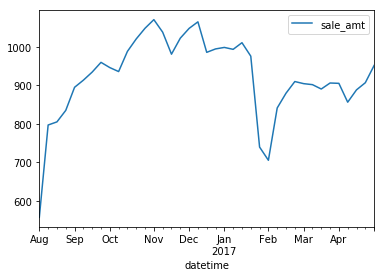

In [46]:
sumPeerWeek_week = sumPeerWeek.set_index('datetime')
sumPeerWeek_week.plot()
#plt.legend(loc='best')

In [64]:
AllFeature = baiduIndexDate
AllFeature['sale_amt'] = sumPeerWeek_week['sale_amt']*200
print(AllFeature.head(10))

            iphone  computer  alldev       sale_amt
datetime                                           
2016-08-07  140994    236530  377524  111337.822900
2016-08-14  139847    237085  376932  159410.196734
2016-08-21  137562    232730  370292  161034.606182
2016-08-28  136249    237919  374168  167023.929274
2016-09-04  151523    260567  412090  179047.280987
2016-09-11  156142    209142  365284  182757.048095
2016-09-18  144647    251723  396370  186977.474916
2016-09-25  152643    226622  379265  192036.990908
2016-10-02  158812    167614  326426  189307.499325
2016-10-09  146441    235138  381579  187246.425881


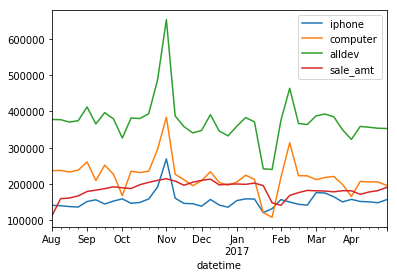

In [65]:
AllFeature.plot()

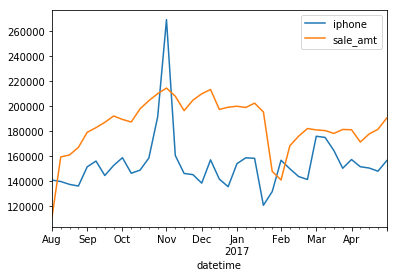

In [69]:
AllFeature[['iphone','sale_amt']].plot()